In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("dane.xlsx")

In [4]:
data.head()

,Status,Patient ID,Age,Sex,Year of diagnosis,Year of follow-up recode,Year of death recode,Months from diagnosis to treatment,Survival months,Marital status at diagnosis,...,Stage,Tumor size,Grade,Stage A,ER Status,PR Status,Regional nodes examined,Regional nodes positive,Laterality,Sequence number
0,Dead,139,70,Female,2010,2011,2011,2,12,Single (never married),...,IIB,80,Poorly differentiated; Grade III,Localized,Negative,Negative,3,0,Left - origin of primary,3rd of 3 or more primaries
1,Alive,309,54,Female,2015,2020,Alive at last contact,2,60,Married (including common law),...,IIA,15,Moderately differentiated; Grade II,Regional,Positive,Positive,7,1,Right - origin of primary,2nd of 2 or more primaries
2,Dead,346,35,Female,2004,2015,2015,1,130,Married (including common law),...,IIB,110,Moderately differentiated; Grade II,Localized,Positive,Positive,6,0,Right - origin of primary,2nd of 2 or more primaries
3,Alive,391,56,Female,2014,2020,Alive at last contact,1,81,Married (including common law),...,I,19,Moderately differentiated; Grade II,Localized,Positive,Positive,1,0,Right - origin of primary,2nd of 2 or more primaries
4,Alive,482,62,Female,2004,2020,Alive at last contact,1,194,Married (including common law),...,I,12,Well differentiated; Grade I,Localized,Positive,Positive,6,0,Right - origin of primary,2nd of 2 or more primaries


In [5]:
data.isnull().sum()

Status                                0
Patient ID                            0
Age                                   0
Sex                                   0
Year of diagnosis                     0
Year of follow-up recode              0
Year of death recode                  0
Months from diagnosis to treatment    0
Survival months                       0
Marital status at diagnosis           0
Race                                  0
T Category                            0
N Category                            0
M Category                            0
Stage                                 0
Tumor size                            0
Grade                                 0
Stage A                               0
ER Status                             0
PR Status                             0
Regional nodes examined               0
Regional nodes positive               0
Laterality                            0
Sequence number                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487816 entries, 0 to 487815
Data columns (total 24 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Status                              487816 non-null  object
 1   Patient ID                          487816 non-null  int64 
 2   Age                                 487816 non-null  int64 
 3   Sex                                 487816 non-null  object
 4   Year of diagnosis                   487816 non-null  int64 
 5   Year of follow-up recode            487816 non-null  int64 
 6   Year of death recode                487816 non-null  object
 7   Months from diagnosis to treatment  487816 non-null  int64 
 8   Survival months                     487816 non-null  int64 
 9   Marital status at diagnosis         487816 non-null  object
 10  Race                                487816 non-null  object
 11  T Category                          487

In [7]:
data[list({"Age","Months from diagnosis to treatment","Survival months","Tumor size",
      "Regional nodes examined","Regional nodes positive"})].describe()

,Regional nodes positive,Regional nodes examined,Survival months,Months from diagnosis to treatment,Tumor size,Age
count,487816.00000,487816.000000,487816.000000,487816.000000,487816.000000,487816.000000
mean,1.18474,7.139950,106.509600,1.005020,21.580977,60.423301
std,3.20352,9.677172,48.381426,1.021245,20.605680,13.079720
min,0.00000,1.000000,0.000000,0.000000,0.000000,8.000000
25%,0.00000,2.000000,71.000000,0.000000,10.000000,51.000000
50%,0.00000,4.000000,103.000000,1.000000,16.000000,60.000000
75%,1.00000,10.000000,144.000000,1.000000,25.000000,70.000000
max,90.00000,98.000000,203.000000,24.000000,988.000000,90.000000


In [8]:
#filtrowanie i usuwanie zbednych zmiennych
data = data[data['Sex']=='Female']
data = data.drop('Sex', axis=1)
data = data.drop('Year of diagnosis', axis=1)
data = data.drop('Year of follow-up recode', axis=1)
data = data.drop('Marital status at diagnosis', axis=1)
data = data.drop('Regional nodes examined', axis=1)
data = data.drop('Patient ID', axis=1)

In [9]:
#kodowanie zmiennych

status_mapping = {"Dead": 0, "Alive": 1}
data['Status'] = data['Status'].map(status_mapping)

race_mapping = {'White': 0, 'Black': 1, 'Asian or Pacific Islander': 2, 'American Indian/Alaska Native': 3}
data['Race'] = data['Race'].map(race_mapping)

t_mapping = {'T0': 0, 'T1a': 1, 'T1b': 2, 'T1c': 3, 'T1mic': 4, 'T2': 5, 'T3': 6, 'T4a': 7, 'T4b': 8, 'T4c': 9, 'T4d': 10, 
             'Tis': 11, 'Any T, Mets': 12, 'TX Adjusted': 13}
data['T Category'] = data['T Category'].map(t_mapping)

n_mapping = {'N0': 0, 'N1': 1, 'N2': 2, 'N3': 3, 'NX Adjusted': 4}
data['N Category'] = data['N Category'].map(n_mapping)

m_mapping = {'M0': 0, 'M1': 1, 'MX': 2}
data['M Category'] = data['M Category'].map(m_mapping)

stage_mapping = {'0': 0, 'I': 1, 'IIA': 2, 'IIB': 3, 'IIIA': 4, 'IIIB': 5, 'IIIC': 6, 'IIINOS': 7, 'IV': 8}
data['Stage'] = data['Stage'].map(stage_mapping)

grade_mapping = {'Well differentiated; Grade I': 1,
                  'Moderately differentiated; Grade II': 2,
                  'Poorly differentiated; Grade III': 3,
                  'Undifferentiated; anaplastic; Grade IV': 4}
data['Grade'] = data['Grade'].map(grade_mapping)

stagea_mapping = {"Localized": 0, "Regional": 1, "Distant": 2}
data['Stage A'] = data['Stage A'].map(stagea_mapping)

erprstatus_mapping = {"Negative": 0, "Positive": 1}
data['ER Status'] = data['ER Status'].map(erprstatus_mapping)
data['PR Status'] = data['PR Status'].map(erprstatus_mapping)

laterality_mapping = {'Only one side - side unspecified': 0, 'Left - origin of primary': 1, 'Right - origin of primary': 2,
                  'Paired site, but no information concerning laterality': 3, 'Bilateral, single primary': 4}
data['Laterality'] = data['Laterality'].map(laterality_mapping)

sqnr_mapping = {'One primary only': 0, '1st of 2 or more primaries': 1, '2nd of 2 or more primaries': 2,
                '3rd of 3 or more primaries': 3, '4th of 4 or more primaries': 4, '5th of 5 or more primaries': 5,
                '6th of 6 or more primaries': 6, '7th of 7 or more primaries': 7, '8th of 8 or more primaries': 8,
                '9th of 9 or more primaries': 9, '11th of 11 or more primaries': 11, '12th of 12 or more primaries': 12}
data['Sequence number'] = data['Sequence number'].map(sqnr_mapping)

data.loc[data["Year of death recode"] == "Alive at last contact", "Year of death recode"] = 9999
data[["Year of death recode"]] = data[["Year of death recode"]].apply(pd.to_numeric)

<Axes: >

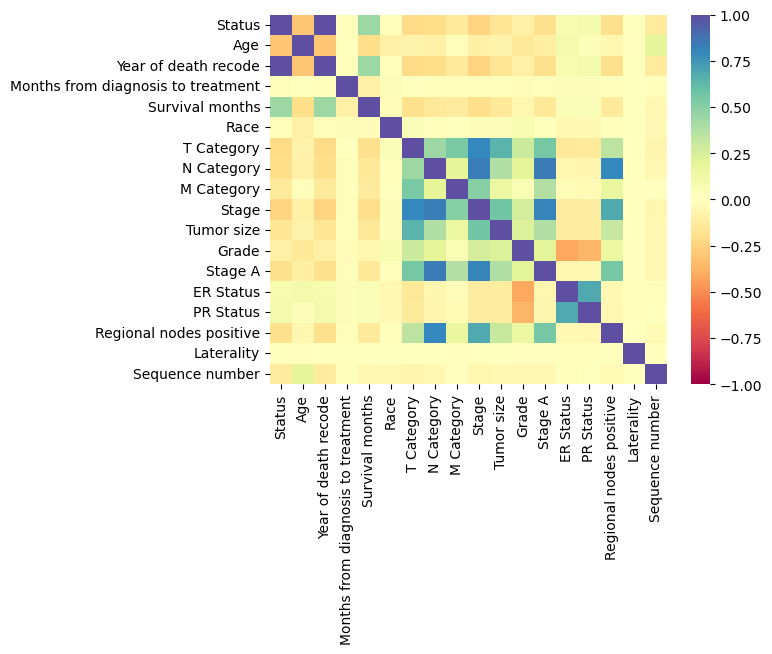

In [10]:
import seaborn as sns
sns.heatmap(data.corr(numeric_only=True), cmap='Spectral',center=0, vmin=-1, vmax=1)

In [11]:
data = data.drop('Year of death recode', axis=1) # przez ta zmienna wychodzic bedzie accuracy=1

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484343 entries, 0 to 487815
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Status                              484343 non-null  int64
 1   Age                                 484343 non-null  int64
 2   Months from diagnosis to treatment  484343 non-null  int64
 3   Survival months                     484343 non-null  int64
 4   Race                                484343 non-null  int64
 5   T Category                          484343 non-null  int64
 6   N Category                          484343 non-null  int64
 7   M Category                          484343 non-null  int64
 8   Stage                               484343 non-null  int64
 9   Tumor size                          484343 non-null  int64
 10  Grade                               484343 non-null  int64
 11  Stage A                             484343 non-null  int6

In [13]:
data.shape

(484343, 17)

# Podział zbioru na zbiór uczący i testowy

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Status', axis=1)
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Regresja logistyczna

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
#utworzenie obiektu modelu regresji logistycznej
reglog = LogisticRegression()
#dopasowanie modelu na zbiorze uczacym
reglog.fit(X_train, y_train)

LogisticRegression()

In [18]:
#ocena dokladnosci modelu na zbiorze uczacym
train_acc = reglog.score(X_train, y_train)
print('Dokladnosc modelu na zbiorze uczacym: {:.2f}%'.format(train_acc*100))

Dokladnosc modelu na zbiorze uczacym: 82.31%


In [19]:
#predykcja na zbiorze testowym
pred_y_test = reglog.predict(X_test)

test_acc = accuracy_score(y_test, pred_y_test)
print('Dokladnosc modelu na zbiorze testowym: {:.2f}%'.format(test_acc*100))

Dokladnosc modelu na zbiorze testowym: 82.16%


### Krzywa ROC

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#prawdopodobienstwa dla zbioru testowego
prob_y_test = reglog.predict_proba(X_test)[:, 1]
#wyznaczenie parametrow krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, prob_y_test)
auc_roc = roc_auc_score(y_test, prob_y_test)

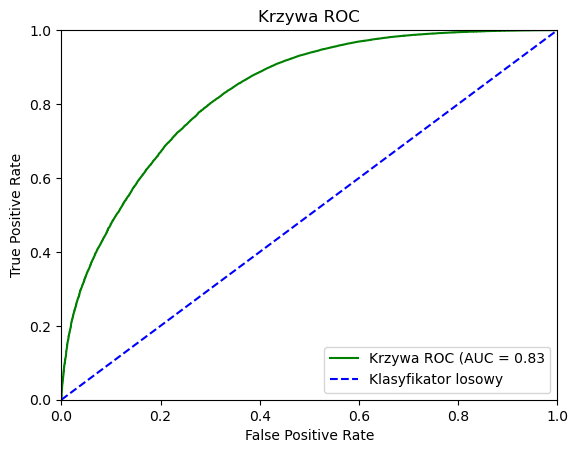

In [22]:
plt.plot(fpr, tpr, color='green', label='Krzywa ROC (AUC = %0.2f' % auc_roc)
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Klasyfikator losowy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix, mean_squared_error

### Blad sredniokwadratowy

In [25]:
pred_y_train = reglog.predict(X_train)
pred_y_test = reglog.predict(X_test)
train_acc = accuracy_score(y_train, pred_y_train)
test_acc = accuracy_score(y_test, pred_y_test)
mse_train = mean_squared_error(y_train, pred_y_train)
mse_test = mean_squared_error(y_test, pred_y_test)

print("Dokladnosc na zbiorze uczacym: {:.2f}%".format(train_acc*100))
print("Dokladnosc na zbiorze testowym: {:.2f}%".format(test_acc*100))
print("Bledne klasyfikacje na zbiorze uczacym: {:.2f}%".format((1-train_acc)*100))
print("Bledne klasyfikacje na zbiorze testowym: {:.2f}%".format((1-test_acc)*100))
print("Blad sredniokwadratowy na zbiorze uczacym: {:.2f}%".format(mse_train*100))
print("Blad sredniokwadratowy na zbiorze testowym: {:.2f}%".format(mse_test*100))

Dokladnosc na zbiorze uczacym: 82.31%
Dokladnosc na zbiorze testowym: 82.16%
Bledne klasyfikacje na zbiorze uczacym: 17.69%
Bledne klasyfikacje na zbiorze testowym: 17.84%
Blad sredniokwadratowy na zbiorze uczacym: 17.69%
Blad sredniokwadratowy na zbiorze testowym: 17.84%


### Macierz pomylek

In [27]:
mp_train = confusion_matrix(y_train, pred_y_train)
mp_test = confusion_matrix(y_test, pred_y_test)

labels = ['Predykcja Dead', 'Predykcja Alive', 'Rzeczywiste Dead', 'Rzeczywiste Alive']
mp_labels_train = np.asarray(mp_train).reshape(2,2)

print("Macierz pomylek dla zbioru uczacego:")
print(np.array([['', labels[0], labels[1]], [labels[2], mp_labels_train[0,0], mp_labels_train[0,1]],
               [labels[3], mp_labels_train[1,0], mp_labels_train[1,1]]]))

mp_labels_test = np.asarray(mp_test).reshape(2,2)
print("Macierz pomylek dla zbioru testowego:")
print(np.array([['', labels[0], labels[1]], [labels[2], mp_labels_test[0,0], mp_labels_test[0,1]],
               [labels[3], mp_labels_test[1,0], mp_labels_test[1,1]]]))

Macierz pomylek dla zbioru uczacego:
[['' 'Predykcja Dead' 'Predykcja Alive']
 ['Rzeczywiste Dead' '52634' '49903']
 ['Rzeczywiste Alive' '18649' '266288']]
Macierz pomylek dla zbioru testowego:
[['' 'Predykcja Dead' 'Predykcja Alive']
 ['Rzeczywiste Dead' '13111' '12618']
 ['Rzeczywiste Alive' '4660' '66480']]


### Punkt odciecia na podstawie krzywej ROC

In [29]:
pred_prob_y_train = reglog.predict_proba(X_train)[:,1]
pred_prob_y_test = reglog.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, pred_prob_y_train)
opt_index = np.argmax(tpr-fpr)
opt_threshold = thresholds[opt_index]
print(opt_threshold)

pred_y_train_opt = (pred_prob_y_train >= opt_threshold).astype(int)
pred_y_test_opt = (pred_prob_y_test >= opt_threshold).astype(int)

0.6842628076861109


In [30]:
train_acc_opt = accuracy_score(y_train, pred_y_train_opt)
test_acc_opt = accuracy_score(y_test, pred_y_test_opt)

print('Dokladnosc predykcji na zbiorze uczacym: {:.2f}%'.format(train_acc_opt*100))
print('Dokladnosc predykcji na zbiorze testowym: {:.2f}%'.format(test_acc_opt*100))

Dokladnosc predykcji na zbiorze uczacym: 78.14%
Dokladnosc predykcji na zbiorze testowym: 78.00%


### Macierz pomylek dla wybranego punktu odciecia

In [32]:
mp_train_opt = confusion_matrix(y_train, pred_y_train_opt)
mp_test_opt = confusion_matrix(y_test, pred_y_test_opt)

labels = ['Predykcja Dead', 'Predykcja Alive', 'Rzeczywiste Dead', 'Rzeczywiste Alive']
mp_labels_train_opt = np.asarray(mp_train_opt).reshape(2,2)

print("Macierz pomylek dla zbioru uczacego:")
print(np.array([['', labels[0], labels[1]], [labels[2], mp_labels_train_opt[0,0], mp_labels_train_opt[0,1]],
               [labels[3], mp_labels_train_opt[1,0], mp_labels_train_opt[1,1]]]))

mp_labels_test_opt = np.asarray(mp_test_opt).reshape(2,2)
print("Macierz pomylek dla zbioru testowego:")
print(np.array([['', labels[0], labels[1]], [labels[2], mp_labels_test_opt[0,0], mp_labels_test_opt[0,1]],
               [labels[3], mp_labels_test_opt[1,0], mp_labels_test_opt[1,1]]]))

Macierz pomylek dla zbioru uczacego:
[['' 'Predykcja Dead' 'Predykcja Alive']
 ['Rzeczywiste Dead' '70920' '31617']
 ['Rzeczywiste Alive' '53073' '231864']]
Macierz pomylek dla zbioru testowego:
[['' 'Predykcja Dead' 'Predykcja Alive']
 ['Rzeczywiste Dead' '17711' '8018']
 ['Rzeczywiste Alive' '13296' '57844']]


### Wspolczynniki modelu regresji logistycznej

In [34]:
print("Wyraz wolny:", reglog.intercept_)
print("Wspolczynniki:\t")
zmienne = list(X.columns)
for i, nazwa in enumerate(zmienne):
    print(nazwa, ':', reglog.coef_[0][i])

Wyraz wolny: [1.19435215]
Wspolczynniki:	
Age : -0.04980538404569789
Months from diagnosis to treatment : 0.1722812212386155
Survival months : 0.024195035081494672
Race : 0.1110676752572645
T Category : -0.09380486168853168
N Category : -0.14246645741043007
M Category : -0.18418504654271273
Stage : 0.049726718059446076
Tumor size : -0.003849891118031258
Grade : 0.10783328652747826
Stage A : -0.312853205489381
ER Status : 0.5228817611211068
PR Status : 0.3907691723073836
Regional nodes positive : -0.04685765040444598
Laterality : 0.19733817116304161
Sequence number : -0.3499373420559675


### Ilorazy szans

In [36]:
ilsz = np.exp(reglog.coef_)
for i, nazwa in enumerate(zmienne):
    print(nazwa, ':', ilsz[0][i])

Age : 0.9514145669381752
Months from diagnosis to treatment : 1.1880118804136206
Survival months : 1.0244901099188395
Race : 1.1174705294011045
T Category : 0.9104604106143874
N Category : 0.8672166424963128
M Category : 0.8317818712252018
Stage : 1.050983842223232
Tumor size : 0.9961575102116282
Grade : 1.1138620340989962
Stage A : 0.7313572639210396
ER Status : 1.686881842537191
PR Status : 1.4781172836300238
Regional nodes positive : 0.9542232212125308
Laterality : 1.2181559162627338
Sequence number : 0.7047322454089373


### p-value

In [38]:
import statsmodels.api as sm

reglog2 = sm.Logit(y_train, X_train)
result = reglog2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.419883
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:               387474
Model:                          Logit   Df Residuals:                   387458
Method:                           MLE   Df Model:                           15
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                  0.2734
Time:                        23:40:47   Log-Likelihood:            -1.6269e+05
converged:                       True   LL-Null:                   -2.2390e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Age                                   -0.0394      0.000   -

### Waznosc zmiennych

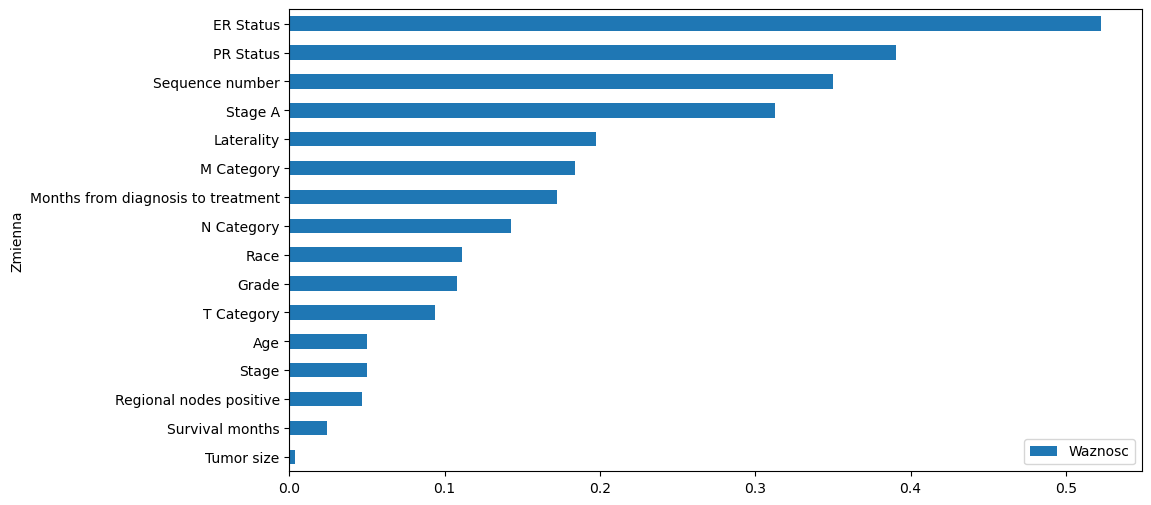

In [40]:
coeffs = reglog.coef_[0]

feature_imp = pd.DataFrame({'Zmienna': X.columns, 'Waznosc': np.abs(coeffs)})
feature_imp = feature_imp.sort_values('Waznosc', ascending=True)
feature_imp.plot(x='Zmienna', y='Waznosc', kind='barh', figsize=(11, 6))
plt.legend(loc='lower right')

# Lasy losowe

In [42]:
from sklearn.ensemble import RandomForestClassifier

#utworzenie obiektu lasu losowego
forest = RandomForestClassifier(n_estimators=100, random_state=1)
#dopasowanie modelu do zbioru uczacego
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [43]:
#predykcja na zbiorze testowym
pred_y_f_test = forest.predict(X_test)
acc_f_test = accuracy_score(y_test, pred_y_f_test)
print('Dokladnosc modelu na zbiorze testowym: {:.2f}%'.format(acc_f_test*100))

Dokladnosc modelu na zbiorze testowym: 83.95%


### Kroswalidacja

In [45]:
from sklearn.model_selection import cross_val_score

scores_f = cross_val_score(forest, X, y, cv=5)
print('Dokladnosc predykcji:', scores_f)
print('Srednia dokladnosc predykcji:', scores_f.mean())

Dokladnosc predykcji: [0.83819385 0.84157987 0.83510721 0.83794442 0.84106206]
Srednia dokladnosc predykcji: 0.8387774809412363


### Krzywa ROC

In [47]:
#prawdopodobienstwa dla zbioru testowego
prob_y_f_test = forest.predict_proba(X_test)[:, 1]
#wyznaczenie parametrow krzywej ROC
fpr, tpr, thresholds = roc_curve(y_test, prob_y_f_test)
auc_f = roc_auc_score(y_test, prob_y_f_test)

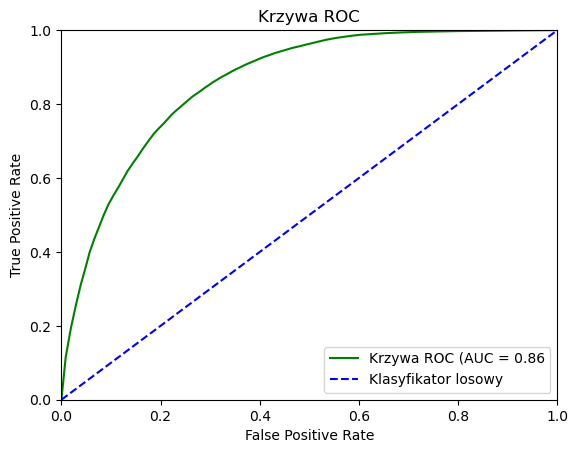

In [48]:
plt.plot(fpr, tpr, color='green', label='Krzywa ROC (AUC = %0.2f' % auc_f)
plt.plot([0,1], [0,1], color='blue', linestyle='--', label='Klasyfikator losowy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

### Waznosc zmiennych

In [82]:
feature_names = X.columns
imp_f = forest.feature_importances_
feature_imp_f = pd.DataFrame({'Zmienna': feature_names, 'Waznosc': imp_f}).sort_values('Waznosc', ascending=False) 
print(feature_imp_f)

                               Zmienna   Waznosc
2                      Survival months  0.449485
0                                  Age  0.204688
8                           Tumor size  0.106298
1   Months from diagnosis to treatment  0.037257
9                                Grade  0.031972
15                     Sequence number  0.027131
13             Regional nodes positive  0.024776
14                          Laterality  0.021903
3                                 Race  0.020260
4                           T Category  0.019226
7                                Stage  0.018334
12                           PR Status  0.012511
11                           ER Status  0.008983
5                           N Category  0.008904
10                             Stage A  0.006823
6                           M Category  0.001450


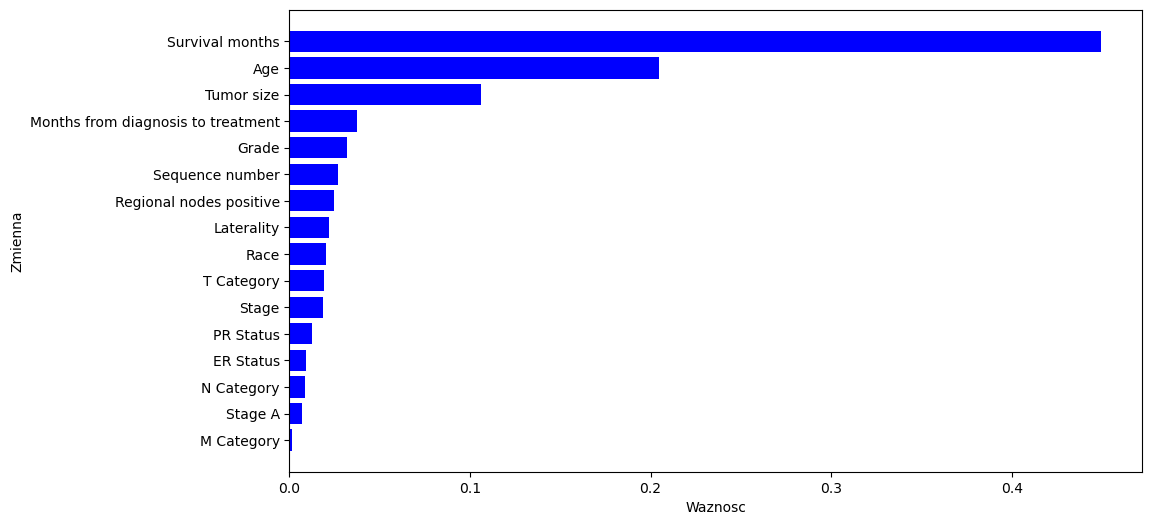

In [84]:
plt.figure(figsize=(11, 6))
plt.barh(feature_imp_f['Zmienna'], feature_imp_f['Waznosc'], color='blue')
plt.xlabel('Waznosc')
plt.ylabel('Zmienna')
plt.gca().invert_yaxis()
plt.show()

# XGBoost

In [87]:
import xgboost as xgb

In [89]:
#utworzenie obiektu xgboost
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=1)
#dopasowanie modelu do zbioru uczacego
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [91]:
#predykcja na zbiorze testowym
pred_y_xgb = model_xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, pred_y_xgb)
print("Dokladnosc predykcji na zbiorze testowym: {:.2f}%".format(acc_xgb*100))

Dokladnosc predykcji na zbiorze testowym: 84.91%


### Model z 10 drzewami

In [94]:
model_xgb_10 = xgb.XGBClassifier(objective="binary:logistic", random_state=1, n_estimators=10)

#dopasowanie modelu do zbioru uczacego
model_xgb_10.fit(X_train, y_train)
#predykcja na zbiorze testowym
pred_y_xgb_10 = model_xgb_10.predict(X_test)

acc_xgb_10 = accuracy_score(y_test, pred_y_xgb_10)
print("Dokladnosc predykcji na zbiorze testowym: {:.2f}%".format(acc_xgb_10*100))

Dokladnosc predykcji na zbiorze testowym: 84.81%


### Walidacja krzyzowa

In [97]:
from sklearn.model_selection import GridSearchCV

model_b = xgb.XGBClassifier()
params_xgb = {'n_estimators': [10, 50, 100, 200, 500]}

gs_xgb = GridSearchCV(model_b, params_xgb, cv=5, scoring='accuracy')
gs_xgb.fit(X_train, y_train)

best_model_xgb = gs_xgb.best_estimator_

In [99]:
#predykcja na zbiorze testowym
pred_y_xgb_best = best_model_xgb.predict(X_test)

acc_best = accuracy_score(y_test, pred_y_xgb_best)
print("Dokladnosc predykcji na zbiorze testowym: {:.2f}%".format(acc_best*100))
print("Najlepsze parametry:", gs_xgb.best_params_)

Dokladnosc predykcji na zbiorze testowym: 84.98%
Najlepsze parametry: {'n_estimators': 50}


In [103]:
params_al = {
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1, 10, 100]
}

gs_al = GridSearchCV(estimator = best_model_xgb, param_grid = params_al, cv=5, n_jobs=-1)
gs_al.fit(X_train, y_train)

best_params_al = gs_al.best_params_
print("Najlepsze wartosci hiperparametrow:", best_params_al)

Najlepsze wartosci hiperparametrow: {'reg_alpha': 10, 'reg_lambda': 1}


### Model stworzony dla najlepszych hiperparametrow

In [106]:
xgb_model_best_p = xgb.XGBClassifier(objectives='binary:logistic', random_state=1, n_estimators=50, reg_alpha=10, reg_lambda=1)
xgb_model_best_p.fit(X_train, y_train)
pred_y_best_p = xgb_model_best_p.predict(X_test)

acc_best_p = accuracy_score(y_test, pred_y_best_p)
print("Dokladnosc predykcji na zbiorze testowym: {:.2f}%".format(acc_best_p*100))

Dokladnosc predykcji na zbiorze testowym: 84.99%


### Waznosc zmiennych

Text(0.5, 0, 'Waznosc')

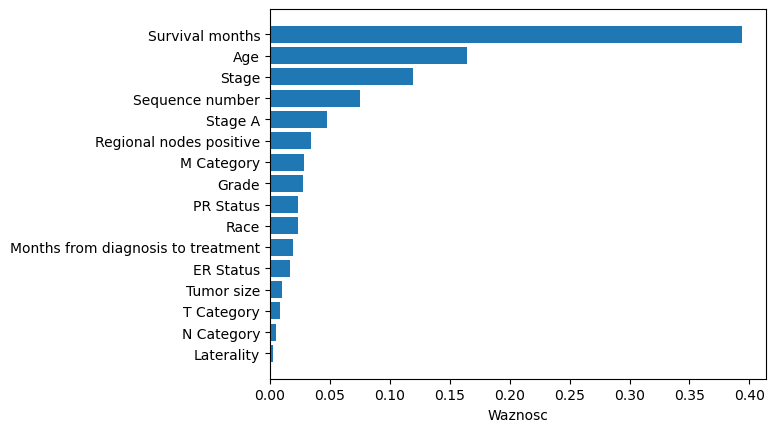

In [109]:
sorted_idx = xgb_model_best_p.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], xgb_model_best_p.feature_importances_[sorted_idx])
plt.xlabel("Waznosc")